# A dataset containing information about the performance of students in a school is available at Performance.csv. Analyze the dataset and identify the factors that contribute to student success

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\data visualization\My Projects\Project 2 (Student Perforamane)\Performance - with no zero.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# *Data Cleaning and Sorting*

In [3]:
#adding column of total score in data
data["total score"]=data[["math score","reading score","writing score"]].sum(axis=1).round(1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [4]:
data.shape

(1000, 9)

In [5]:
data.info()   #no null values founder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total score                  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64

In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score'],
      dtype='object')

# *Exploring Data*

**checking gender head counts**

In [8]:
gender=data["gender"].value_counts()
gender

female    518
male      482
Name: gender, dtype: int64

there are more female students than male

**checking race/ethnicity head counts**

In [9]:
race=data["race/ethnicity"].value_counts()
race

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

there are more students in group C

**checking parental level of education head counts**

In [10]:
education_level=data["parental level of education"].value_counts()
education_level

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

there are more students whom parental level of education is some college and associate's degree

**checking student lunch type head counts**

In [11]:
lunch=data["lunch"].value_counts()
lunch

standard        645
free/reduced    355
Name: lunch, dtype: int64

there are more students having standard lunch

**checking student test preparation course head counts**

In [12]:
test=data["test preparation course"].value_counts()
test

none         642
completed    358
Name: test preparation course, dtype: int64

# *Gender wise Studens's Score*

In [13]:
gender_grouped = data.groupby('gender').mean(numeric_only=True)[['math score','reading score','writing score',"total score"]].round(1)
gender_grouped

,math score,reading score,writing score,total score
gender,,,,
female,63.6,72.6,72.5,208.7
male,68.7,65.5,63.3,197.5


# *Race / ethnicity  wise Studens's Score*

In [14]:
race_ethnicity_grouped = data.groupby('race/ethnicity').mean(numeric_only=True)[['math score','reading score','writing score',"total score"]].round(1)
race_ethnicity_grouped

,math score,reading score,writing score,total score
race/ethnicity,,,,
group A,61.6,64.7,62.7,189.0
group B,63.5,67.4,65.6,196.4
group C,64.5,69.1,67.8,201.4
group D,67.4,70.0,70.1,207.5
group E,73.8,73.0,71.4,218.3


# *Parental education wise Student's score*

In [15]:
parental_education_grouped = data.groupby('parental level of education').mean(numeric_only=True)[['math score','reading score','writing score',"total score"]].round(1)
parental_education_grouped

,math score,reading score,writing score,total score
parental level of education,,,,
associate's degree,67.9,70.9,69.9,208.7
bachelor's degree,69.4,73.0,73.4,215.8
high school,62.1,64.7,62.4,189.3
master's degree,69.7,75.4,75.7,220.8
some college,67.1,69.5,68.8,205.4
some high school,63.5,66.9,64.9,195.3


# *Fees reduction wise Student's score*

In [16]:
lunch_grouped = data.groupby('lunch').mean(numeric_only=True)[['math score','reading score','writing score',"total score"]].round(1)
lunch_grouped

,math score,reading score,writing score,total score
lunch,,,,
free/reduced,58.9,64.7,63.0,186.6
standard,70.0,71.7,70.8,212.5


# *test_preparation wise Student's score*

In [17]:
test_preparation_grouped = data.groupby('test preparation course').mean(numeric_only=True)[['math score','reading score','writing score',"total score"]].round(1)
test_preparation_grouped

,math score,reading score,writing score,total score
test preparation course,,,,
completed,69.7,73.9,74.4,218.0
none,64.1,66.5,64.5,195.1


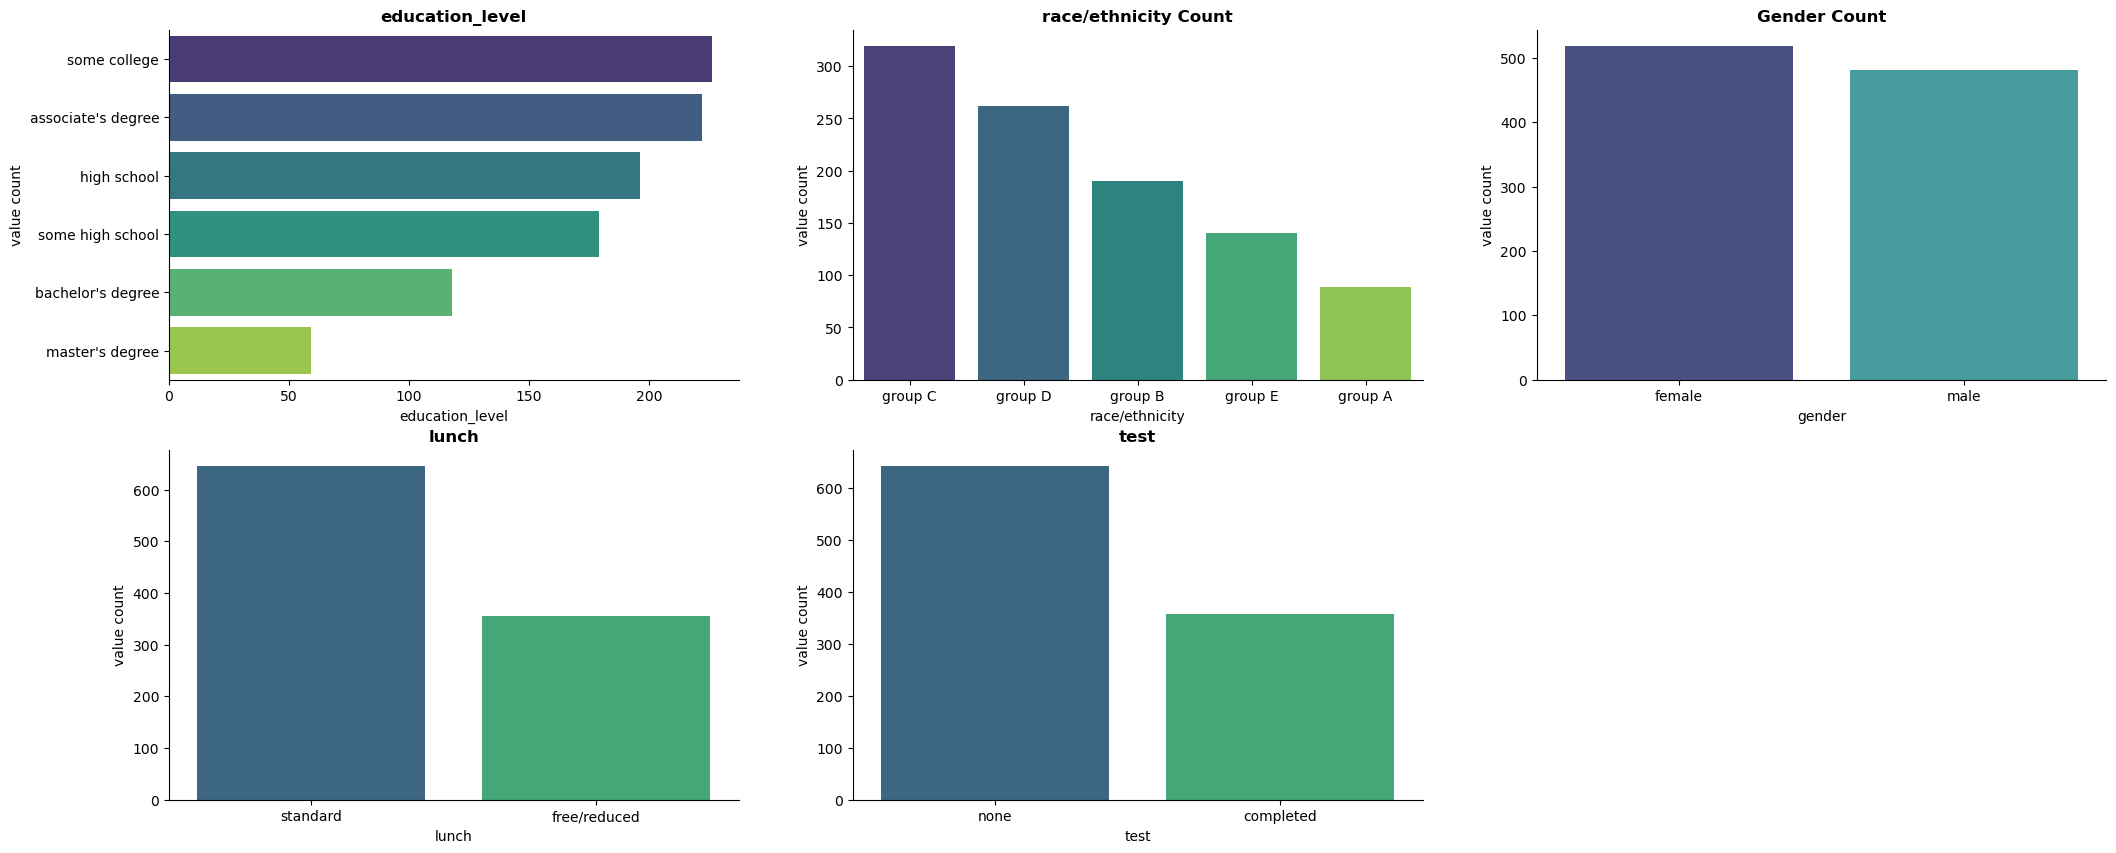

In [18]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 3)
sns.barplot(x=gender.index, y=gender.values,palette='mako')
plt.title('Gender Count',fontweight='bold')
plt.xlabel('gender')
plt.ylabel('value count')
sns.despine()

plt.subplot(2, 3, 2)
sns.barplot(x=race.index, y=race.values,palette='viridis')
plt.title('race/ethnicity Count',fontweight='bold')
plt.xlabel('race/ethnicity')
plt.ylabel('value count')
sns.despine()


plt.subplot(2, 3, 1)
sns.barplot(x=education_level.values, y=education_level.index,palette='viridis')
plt.title('education_level',fontweight='bold')
plt.xlabel('education_level')
plt.ylabel('value count')
sns.despine()

plt.subplot(2, 3, 4)
sns.barplot(x=lunch.index, y=lunch.values,palette='viridis')
plt.title('lunch',fontweight='bold')
plt.xlabel('lunch')
plt.ylabel('value count')
sns.despine()


plt.subplot(2, 3, 5)
sns.barplot(x=test.index, y=test.values,palette='viridis')
plt.title('test',fontweight='bold')
plt.xlabel('test')
plt.ylabel('value count')
sns.despine()

plt.show()

# Data Visualization

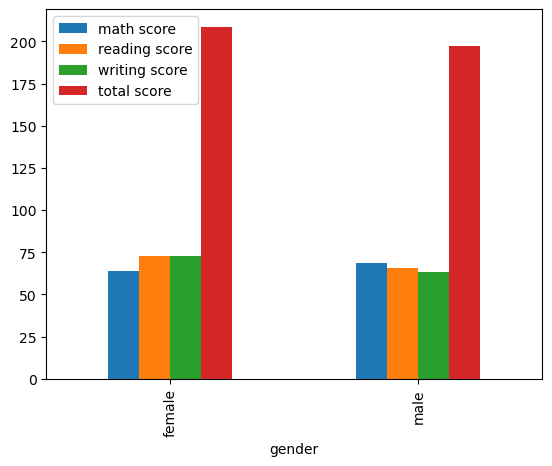

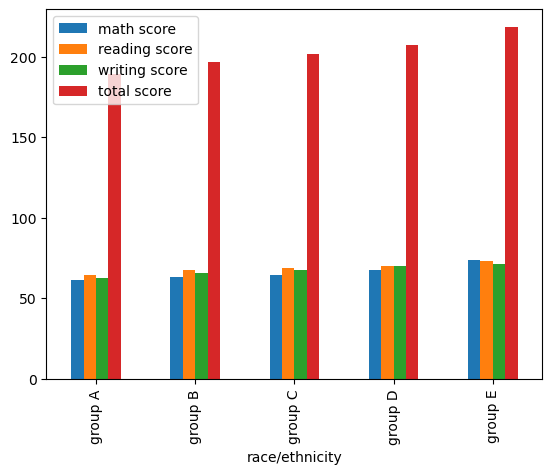

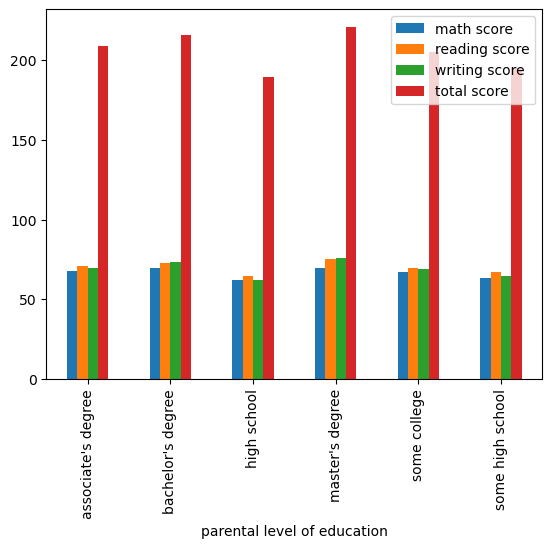

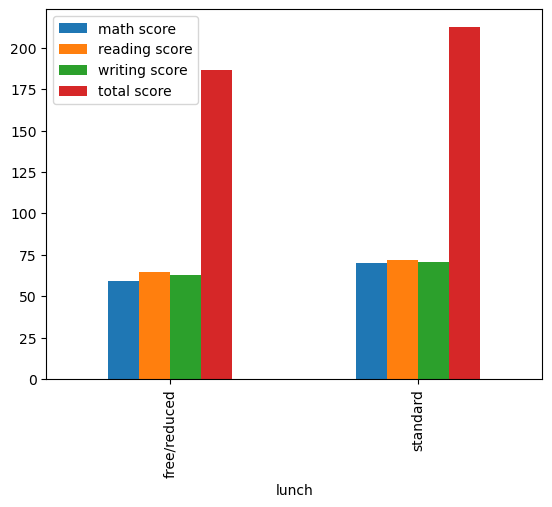

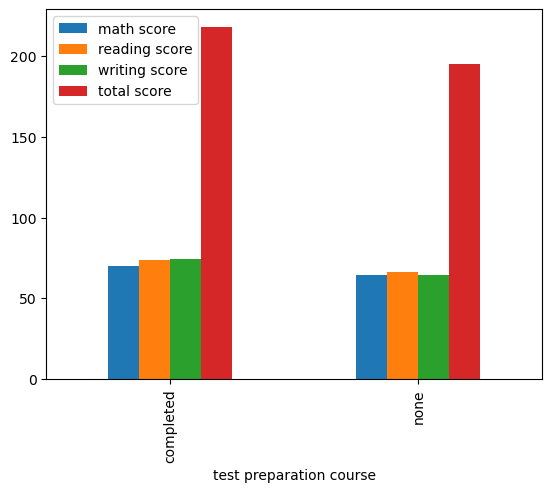

In [19]:
gender_grouped.plot.bar()
plt.subplot(1, 1, 1)

race_ethnicity_grouped.plot.bar()
plt.subplot(1, 1, 1)

parental_education_grouped.plot.bar()
plt.subplot(1, 1, 1)

lunch_grouped.plot.bar()
plt.subplot(1, 1, 1)

     
test_preparation_grouped.plot.bar()
plt.subplot(1, 1, 1)
plt.show()

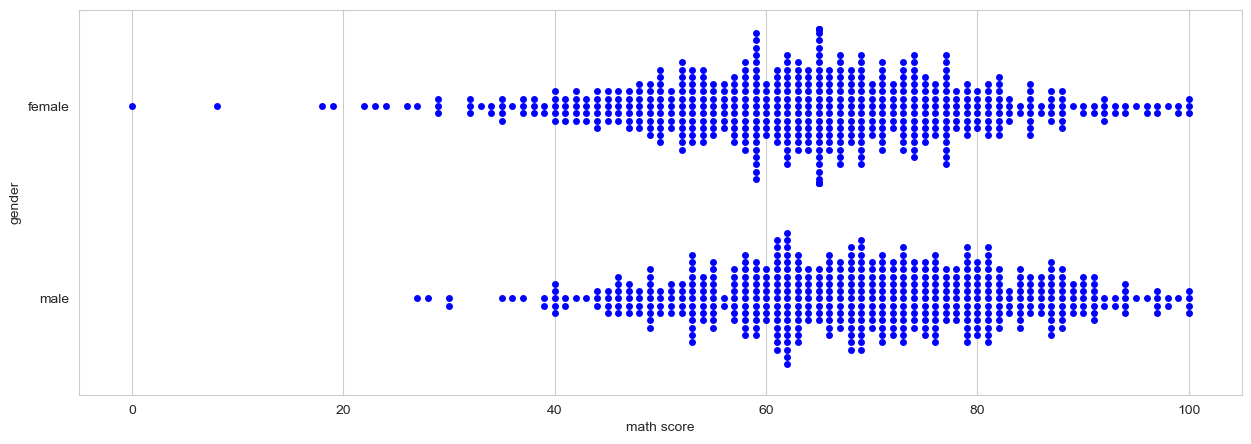

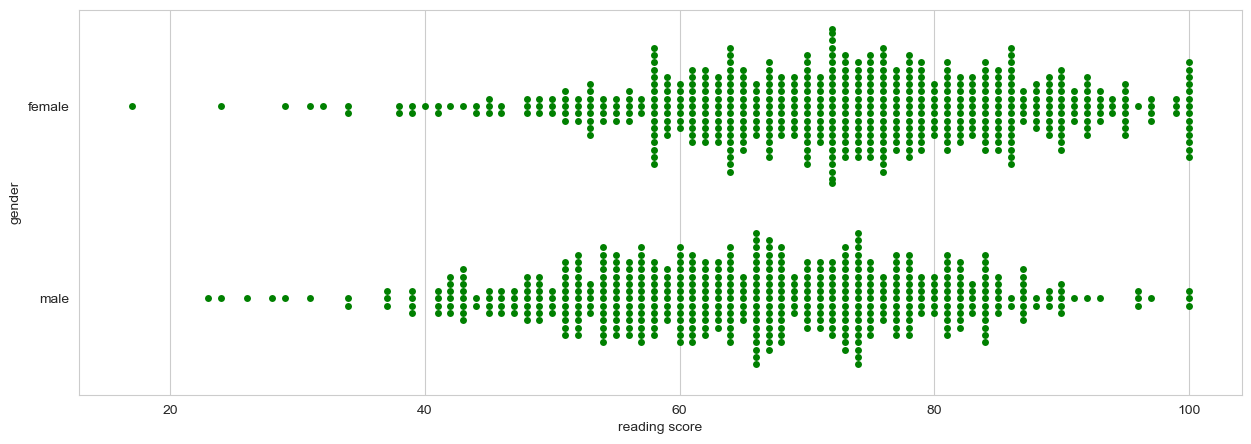

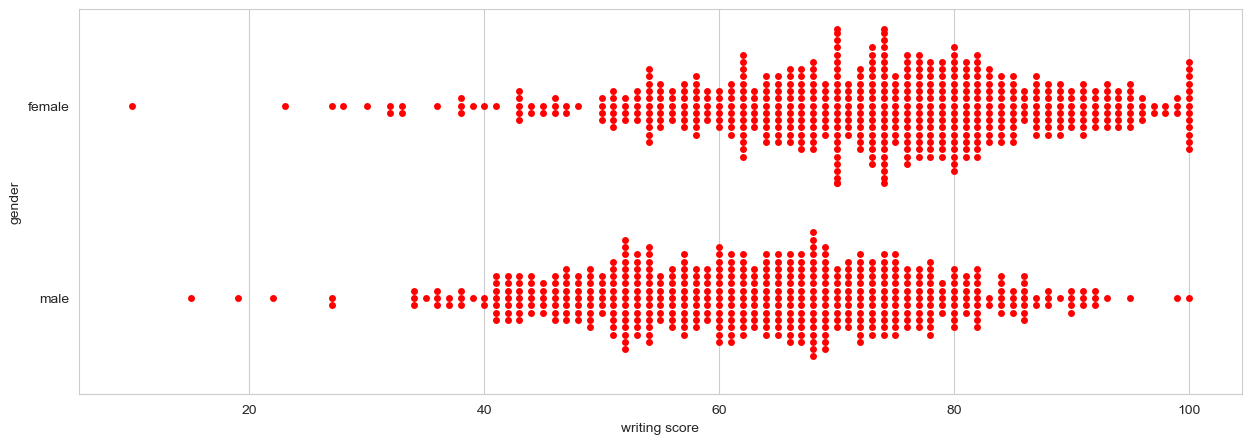

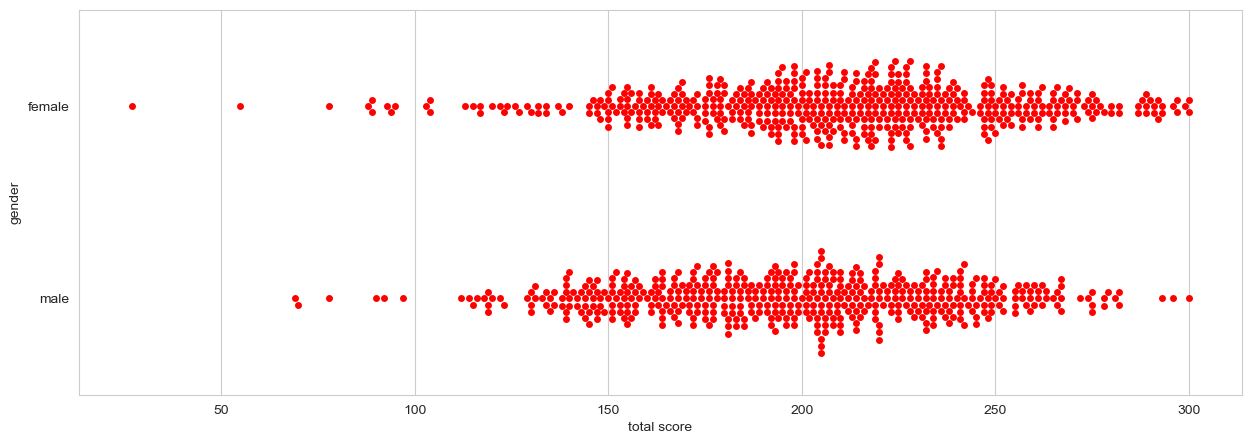

In [20]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='gender', data = data,color="blue") #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='gender', data = data,color="green") #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='gender', data = data,color="red") #writing score

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'total score', y='gender', data = data,color="red") #writing score
plt.show()

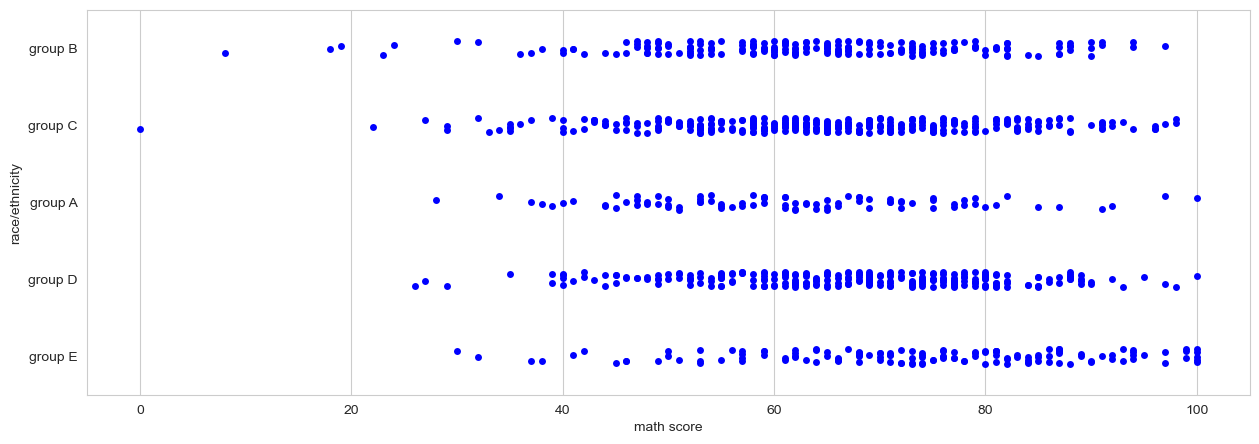

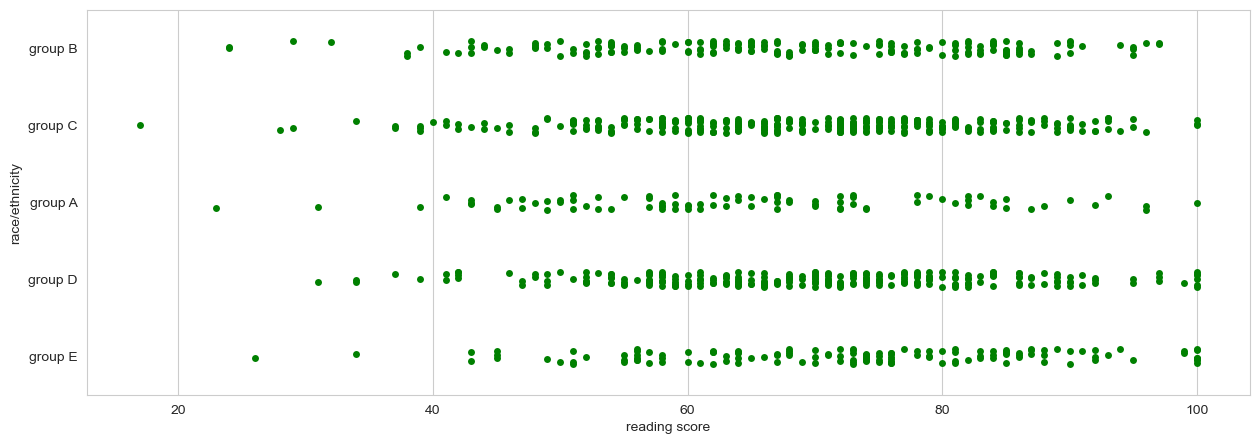

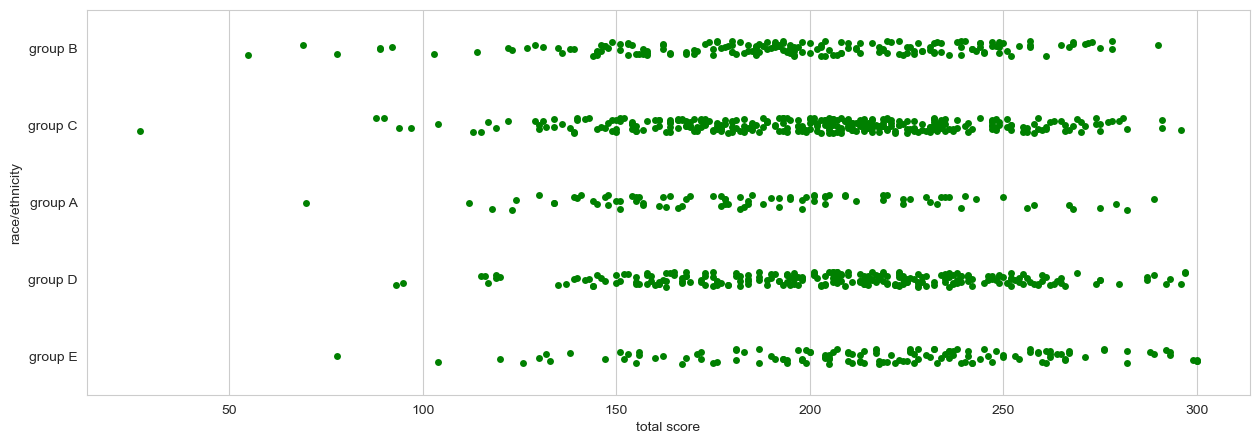

In [21]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'math score', y='race/ethnicity', data = data,color="blue") #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'reading score', y='race/ethnicity', data = data,color="green") #reading score
plt.show()

#f, ax = plt.subplots(1,1,figsize= (15,5))
#ax = sns.stripplot(x = 'writing score', y='grace/ethnicity', data = data,color="red",size=5) #writing score
#plt.show()
f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'total score', y='race/ethnicity', data = data,color="green") #reading score
plt.show()

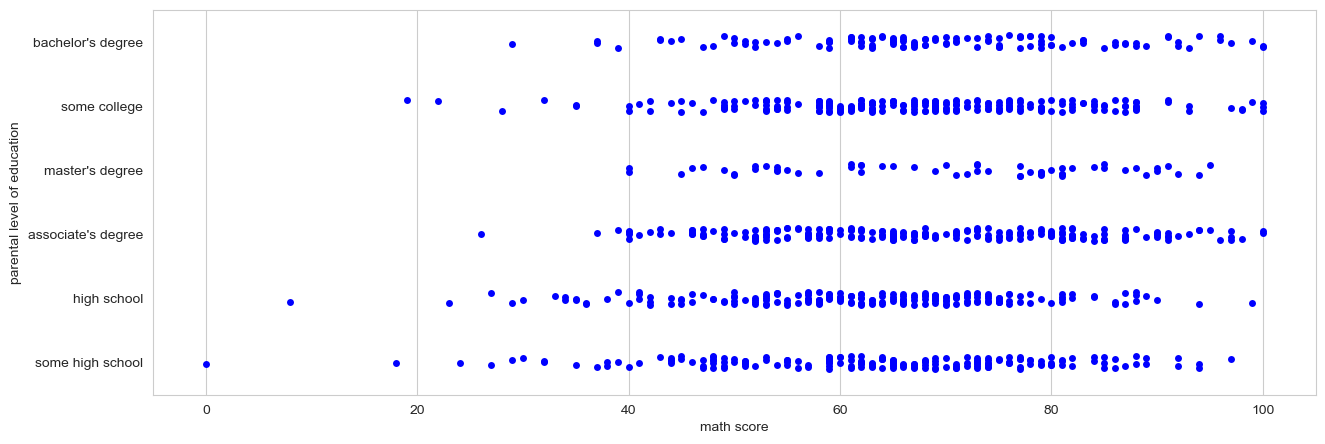

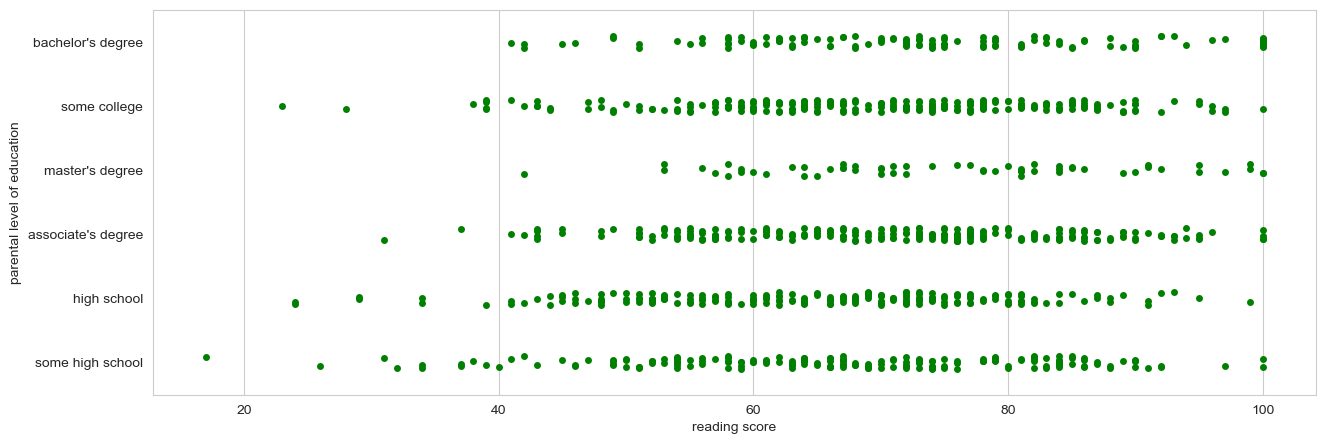

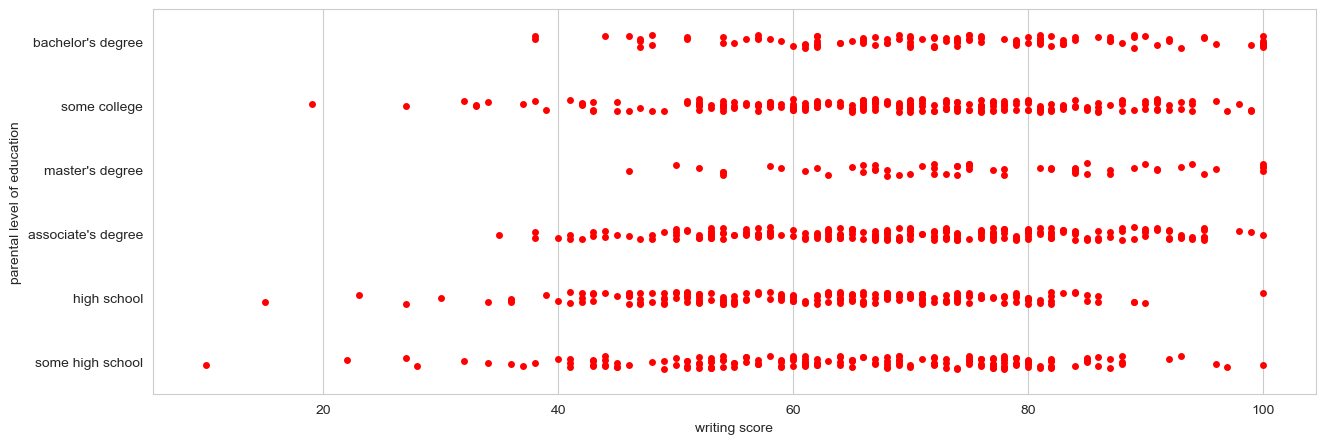

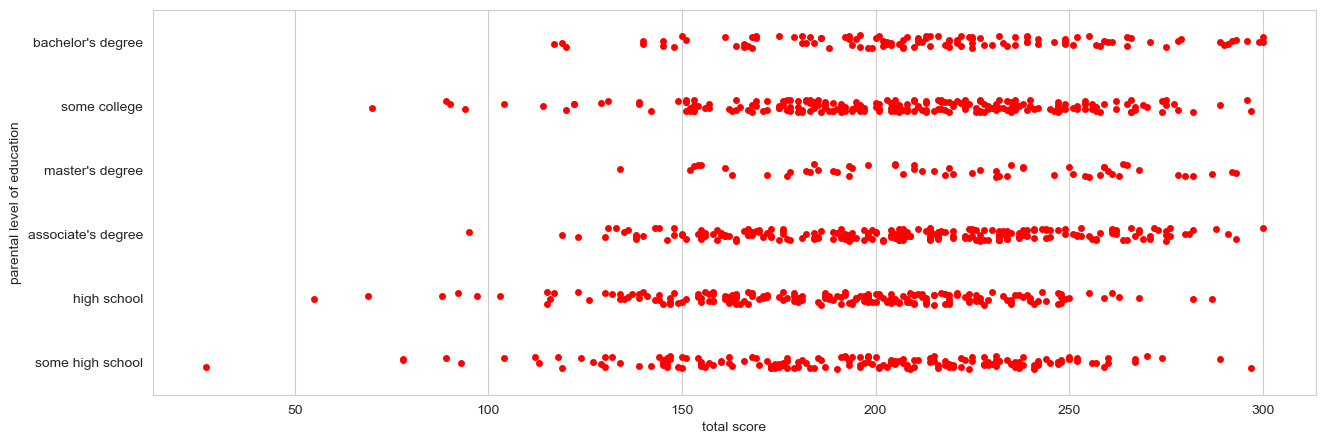

In [22]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'math score', y='parental level of education', data = data,color="blue") #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'reading score', y='parental level of education', data = data,color="green") #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'writing score', y='parental level of education', data = data,color="red") #reading score

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.stripplot(x = 'total score', y='parental level of education', data = data,color="red") #reading score
plt.show()

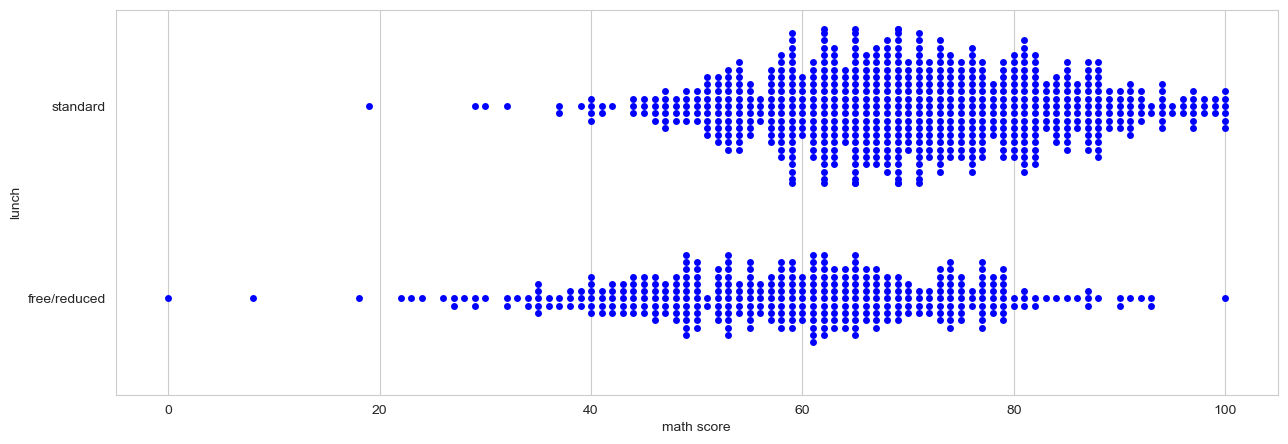

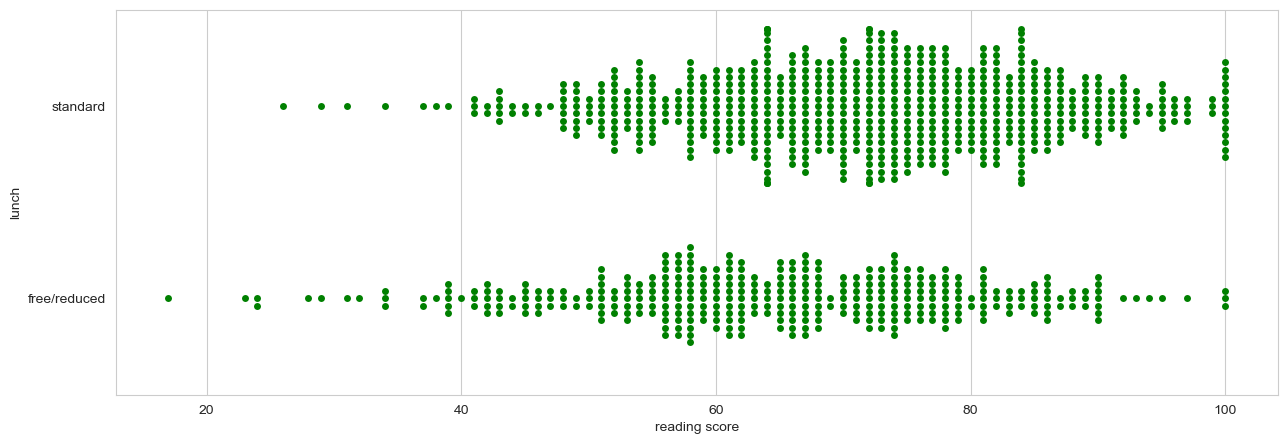

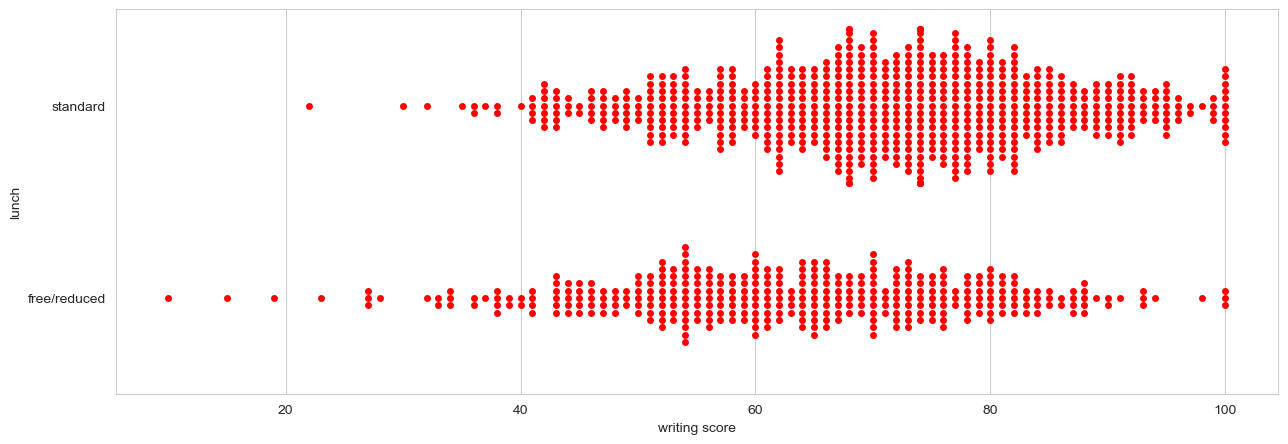

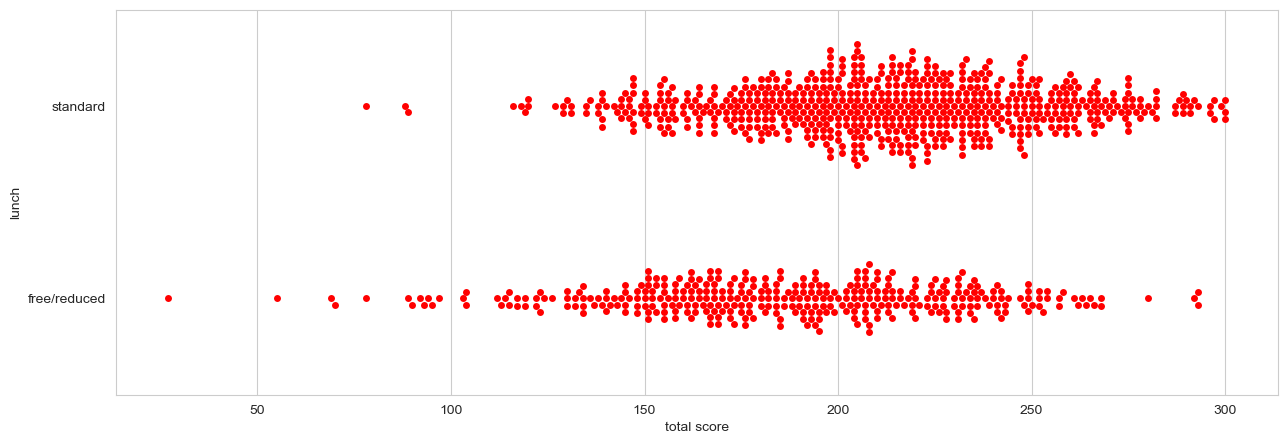

In [23]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='lunch', data = data,color="blue") #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='lunch', data = data,color="green") #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='lunch', data = data,color="red") #reading score

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'total score', y='lunch', data = data,color="red") #reading score
plt.show()

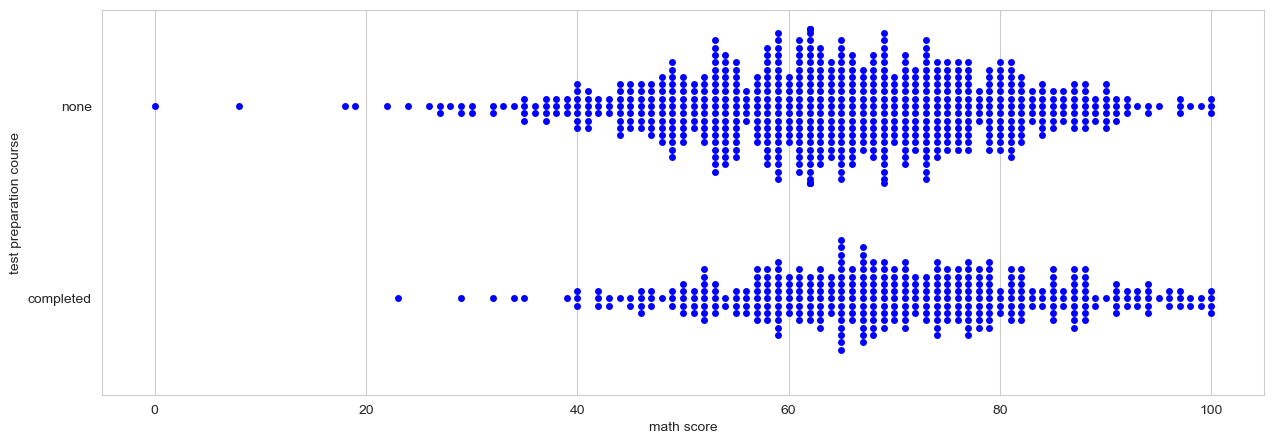

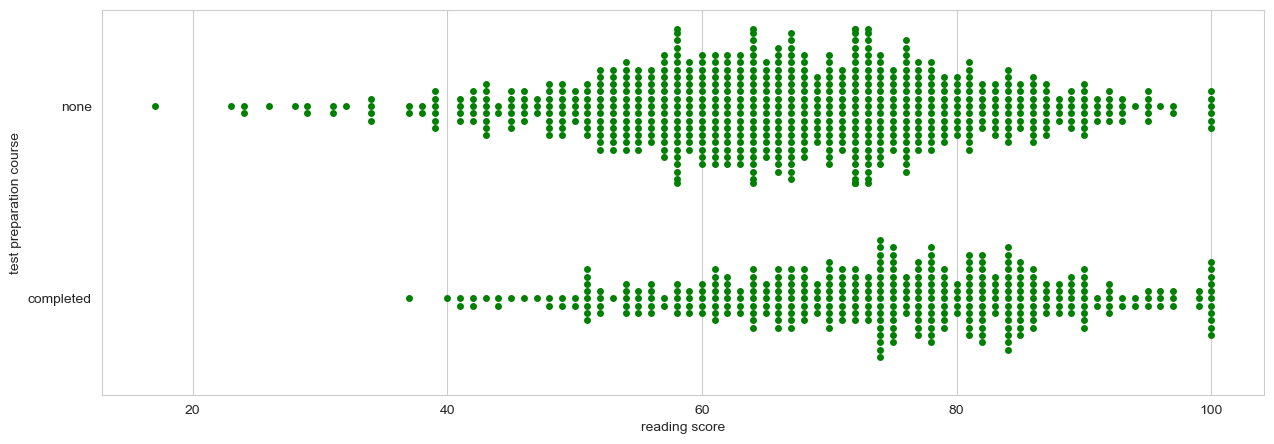

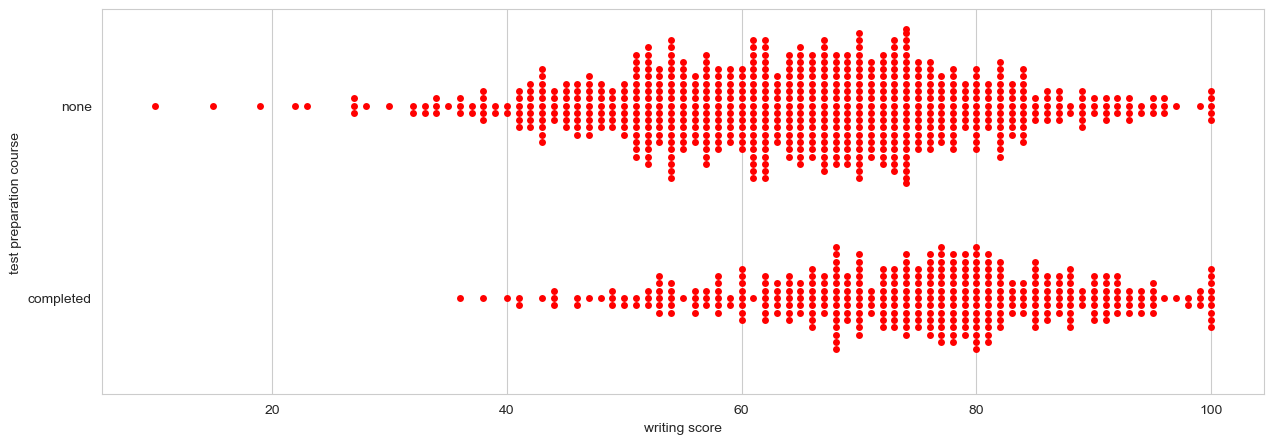

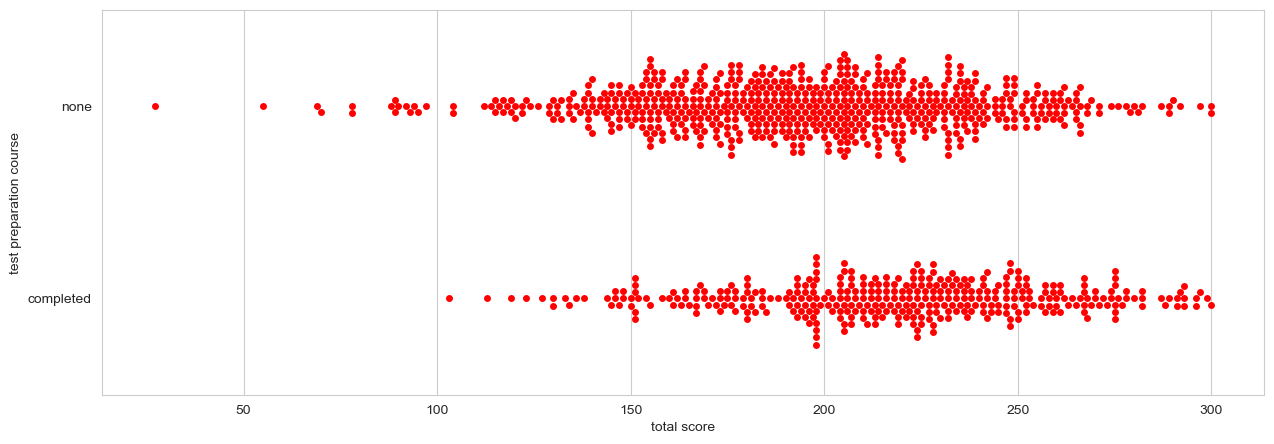

In [24]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='test preparation course', data = data,color="blue") #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='test preparation course', data = data,color="green") #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='test preparation course', data = data,color="red") #reading score

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'total score', y='test preparation course', data = data,color="red") #reading score
plt.show()

# Results: Analysis shows that Test preperation and parental level of education are the factors that contribute in student success 